https://github.com/anandanraju/Credit_Card_Fraud_Detection_Project/blob/main/Credit_Card_Fraud_Detection_Project.ipynb



*   Exploratory Anaysis
*   Model Evauation
*   Generate pkl file



In [6]:
# 1. Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
# 2. Reading DataSet,error_bad_lines=False, engine="python")

cred = pd.read_csv('creditcard.csv', delimiter=',', error_bad_lines=False, engine="python")
cred.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
# 3. Checking Null Set

cred.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [9]:
# 4. Exploring DataSet

cred.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [11]:
cred.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,13954.0,10121.161817,7739.625811,0.000000,2984.250000,9086.500000,17103.500000,24759.000000
V1,13954.0,-0.235676,1.720315,-27.670569,-0.969786,-0.319439,1.162662,1.960497
V2,13954.0,0.284287,1.394804,-34.607649,-0.282728,0.252904,0.884741,10.558600
V3,13954.0,0.846047,1.561376,-24.667741,0.407297,0.960978,1.607031,4.101716
V4,13954.0,0.302775,1.500595,-4.657545,-0.623141,0.220104,1.198942,11.927512
V5,13954.0,-0.118730,1.289494,-32.092129,-0.717155,-0.191627,0.351255,34.099309
V6,13954.0,0.128013,1.320395,-23.496714,-0.624025,-0.144198,0.508494,21.393069
V7,13954.0,-0.157297,1.238583,-26.548144,-0.616307,-0.111960,0.421830,34.303177
V8,13954.0,-0.016148,1.262024,-23.632502,-0.182270,0.016945,0.265736,10.535558
V9,13954.0,0.989827,1.214044,-7.175097,0.288101,0.971414,1.654184,10.392889


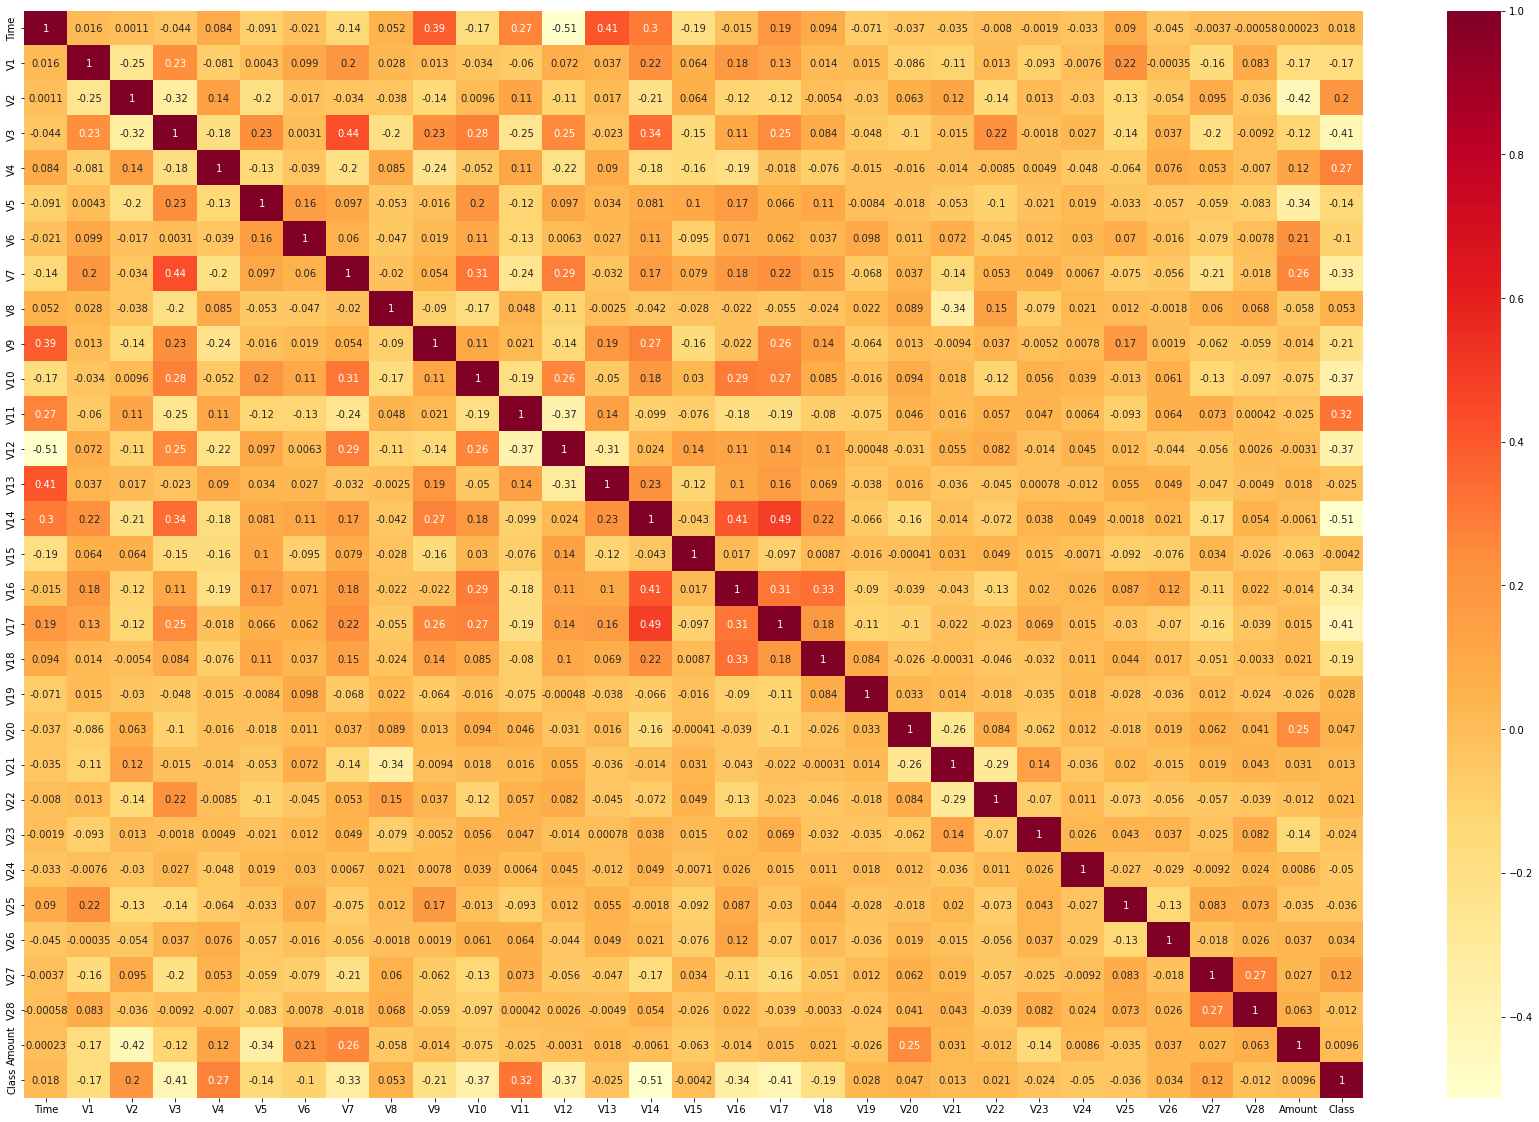

In [12]:
# 5. Exploratory Data Analysis

plt.figure(figsize=(30,20))
sns.heatmap(cred.corr(),annot=True,cmap='YlOrRd')
plt.show()

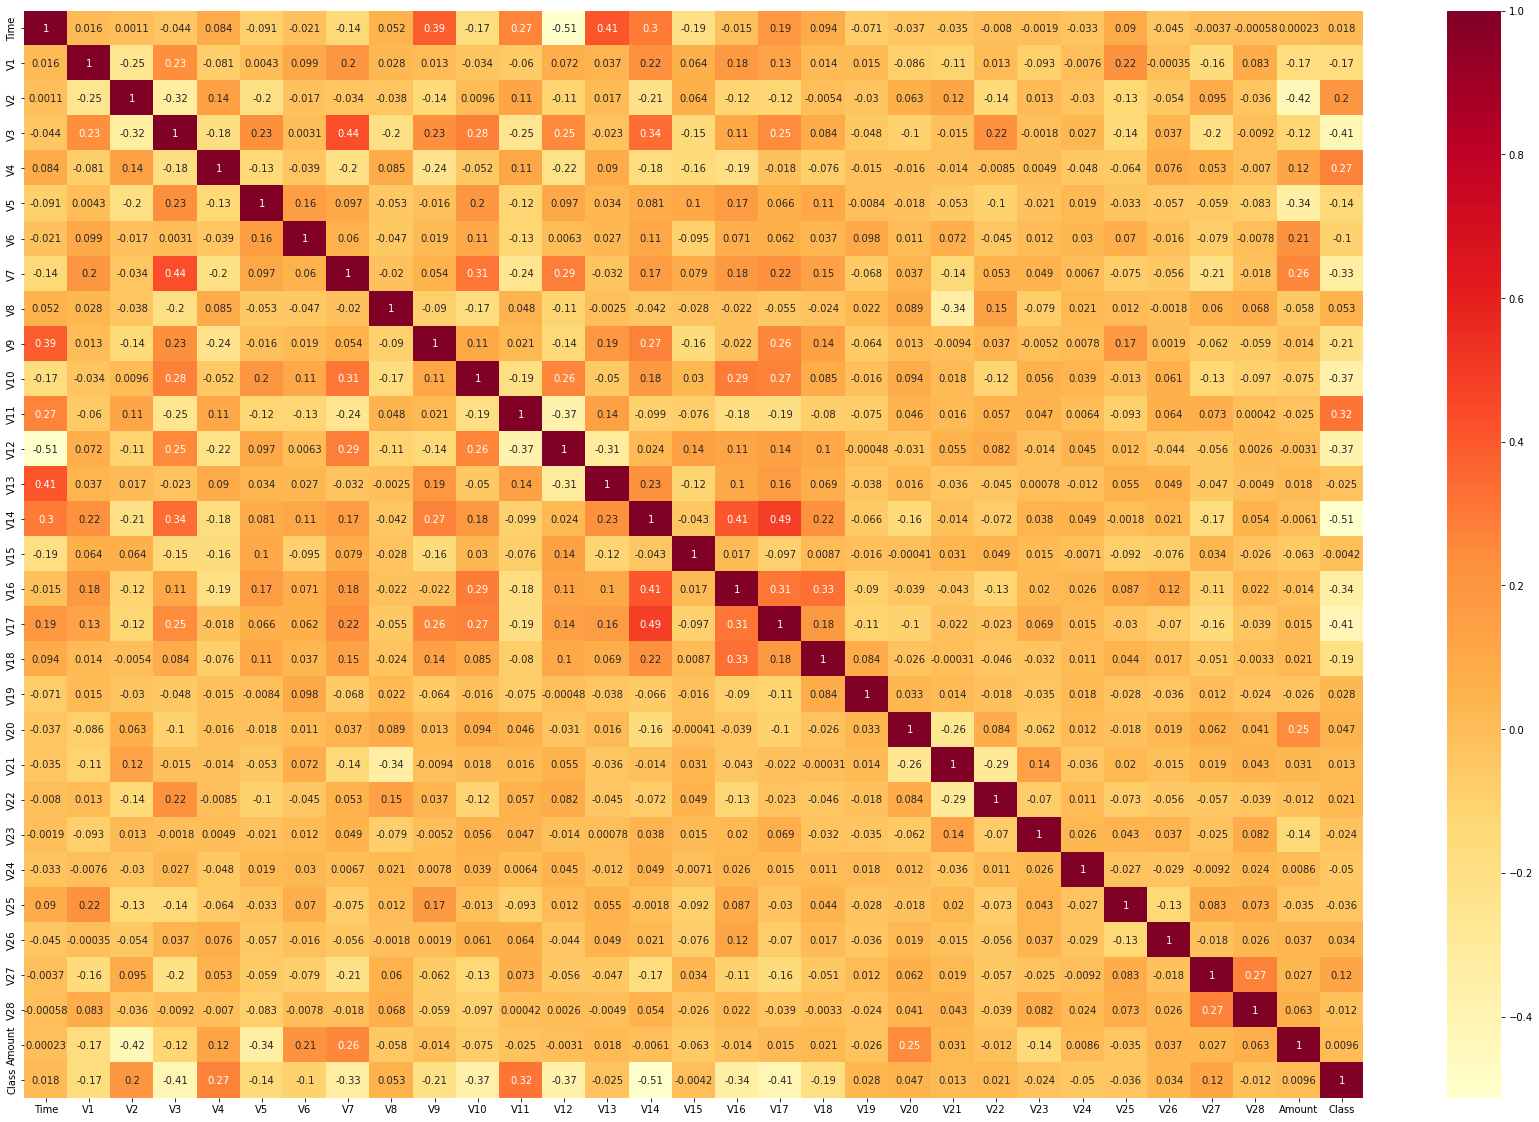

In [13]:
# 5. Exploratory Data Analysis

plt.figure(figsize=(30,20))
sns.heatmap(cred.corr(),annot=True,cmap='YlOrRd')
plt.show()

Text(0, 0.5, 'Number of (V1-V28) Data')

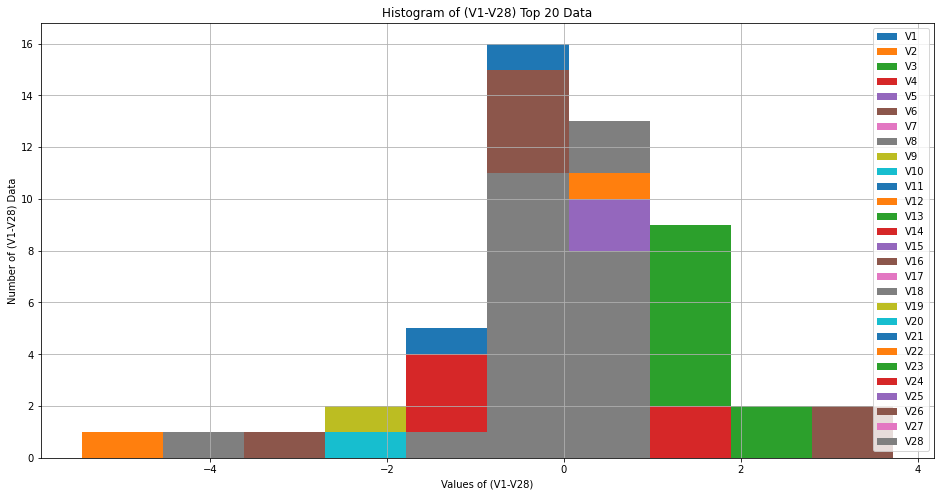

In [14]:
# 5.1 Sampling Technique

cred_=cred.iloc[:,1:29]
cred_hd=cred_.head(20)
cred_hd.plot(kind='hist',figsize=(16,8),grid=True)
plt.title('Histogram of (V1-V28) Top 20 Data')
plt.xlabel('Values of (V1-V28)')
plt.ylabel('Number of (V1-V28) Data')

Text(0, 0.5, 'Number of (V1-V28) Data')

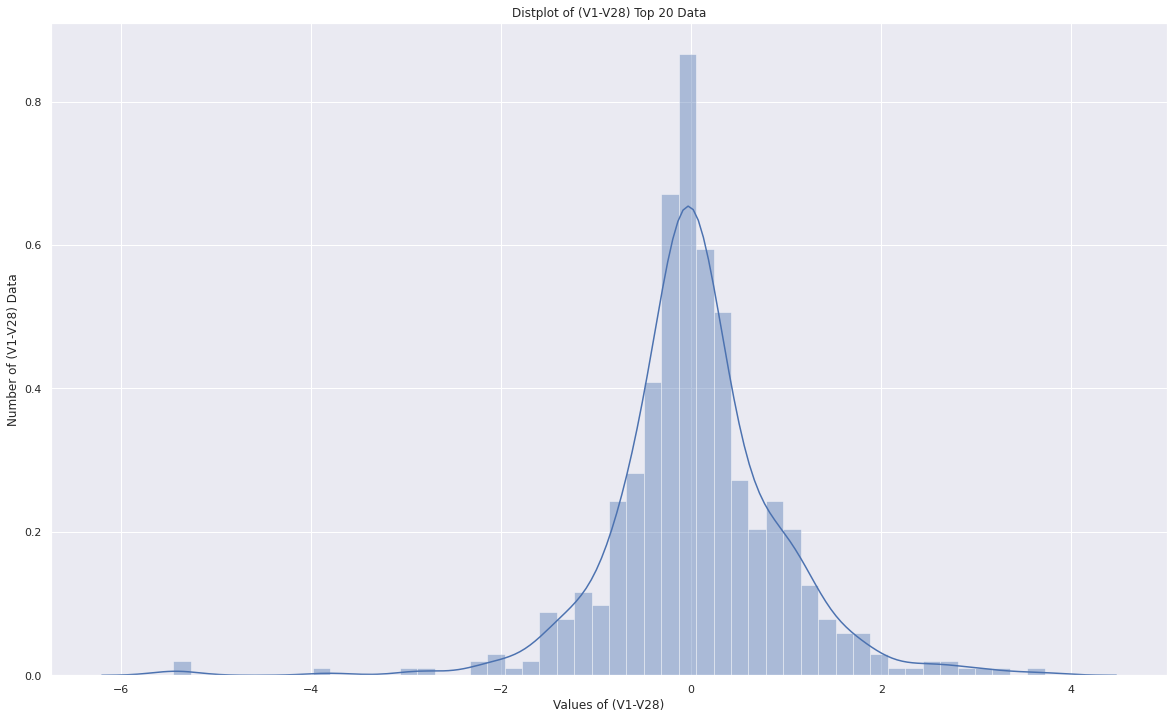

In [15]:
sns.set(rc={'figure.figsize':(20,12)})
sns.distplot(cred_hd)
plt.title('Distplot of (V1-V28) Top 20 Data')
plt.xlabel('Values of (V1-V28)')
plt.ylabel('Number of (V1-V28) Data')

Text(0, 0.5, 'Number of (V1-V28) Data')

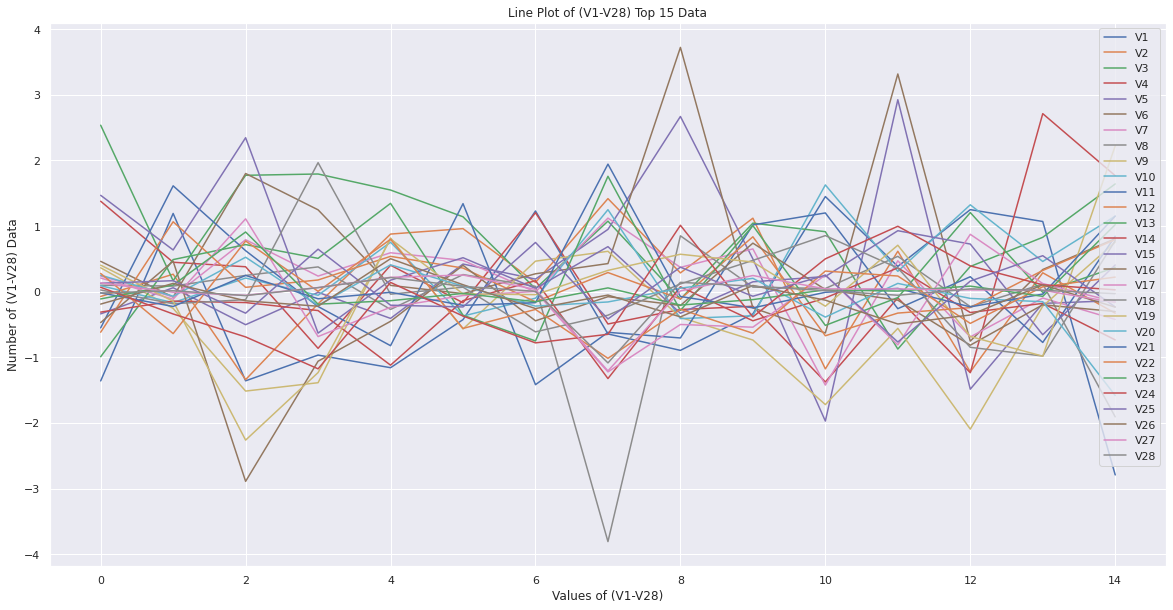

In [16]:
cred_=cred.iloc[:,1:29]
cred_hd=cred_.head(15)
cred_hd.plot(kind='line',figsize=(20,10),grid=True)
plt.title('Line Plot of (V1-V28) Top 15 Data')
plt.xlabel('Values of (V1-V28)')
plt.ylabel('Number of (V1-V28) Data')

Text(0, 0.5, 'Values of (V1 - V28)')

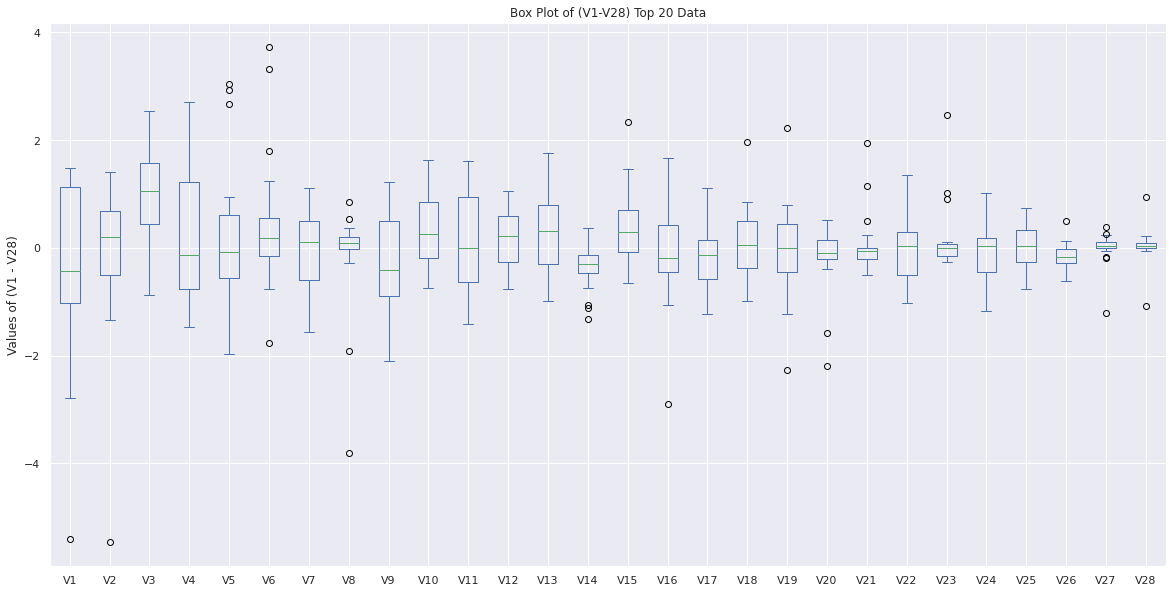

In [17]:
cred_=cred.iloc[:,1:29]
cred_hd=cred_.head(20)
cred_hd.plot(kind='box',figsize=(20,10),grid=True)
plt.title('Box Plot of (V1-V28) Top 20 Data')
plt.ylabel('Values of (V1 - V28)')

Text(0.5, 1.0, 'Bar Plot of (V1-V10) Top 15 Data')

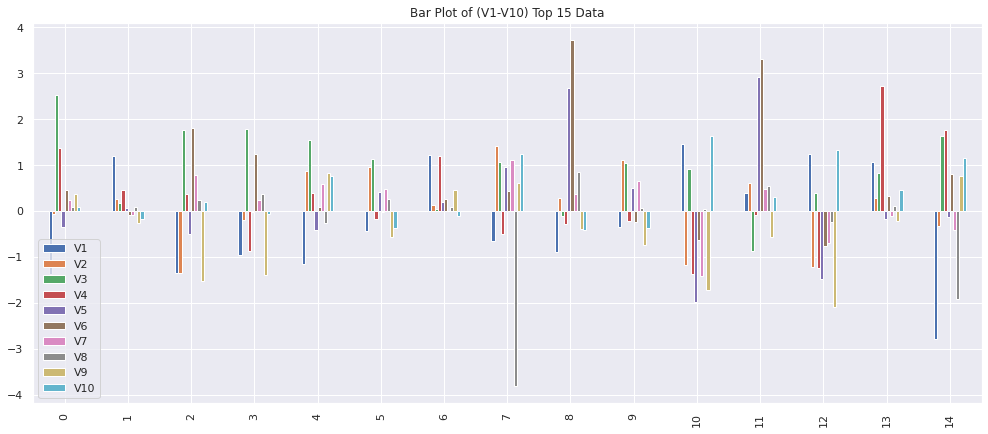

In [18]:
cred_=cred.iloc[:,1:11]
cred_hd=cred_.head(15)
cred_hd.plot(kind='bar',figsize=(17,7),grid=True)
plt.title('Bar Plot of (V1-V10) Top 15 Data')

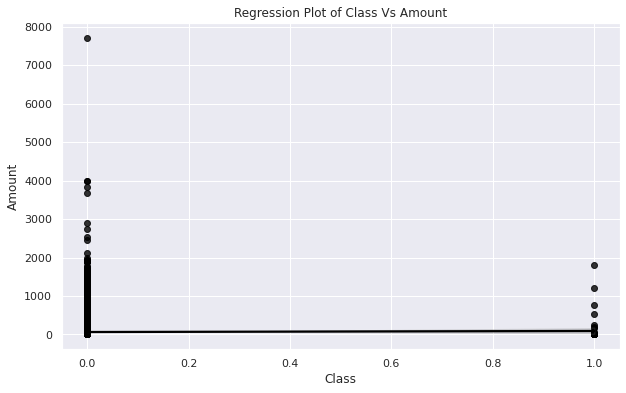

In [19]:
plt.figure(figsize=(10,6))
sns.regplot(x='Class',y='Amount',data=cred,color='black')
plt.title('Regression Plot of Class Vs Amount')
plt.show()

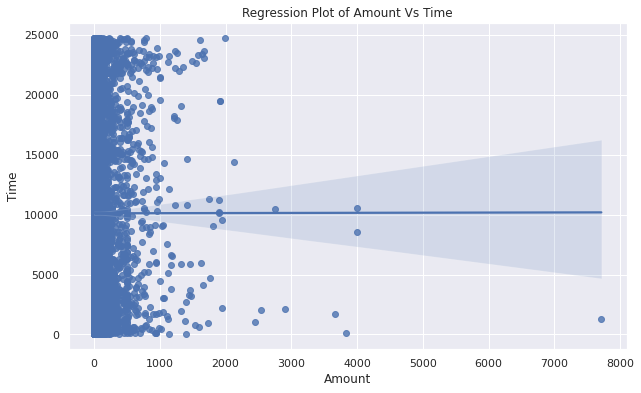

In [20]:
plt.figure(figsize=(10,6))
sns.regplot(x='Amount',y='Time',data=cred)
plt.title('Regression Plot of Amount Vs Time')
plt.show()

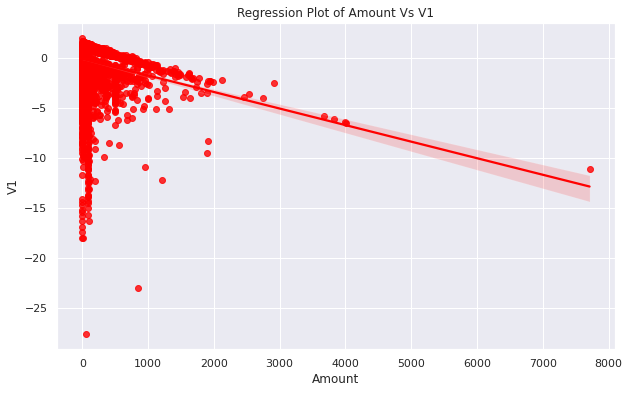

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(x='Amount',y='V1',data=cred,color='red')
plt.title('Regression Plot of Amount Vs V1')
plt.show()

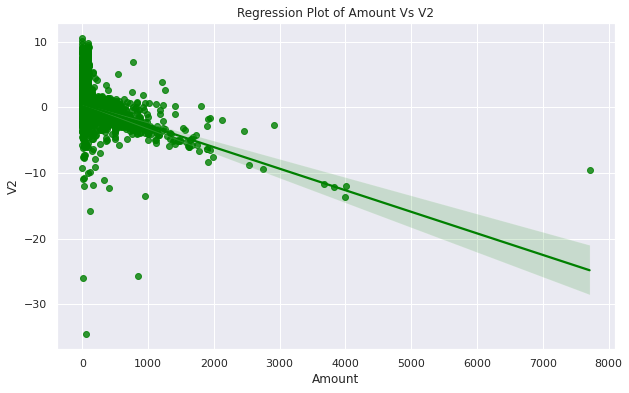

In [22]:
plt.figure(figsize=(10,6))
sns.regplot(x='Amount',y='V2',data=cred,color='green')
plt.title('Regression Plot of Amount Vs V2')
plt.show()

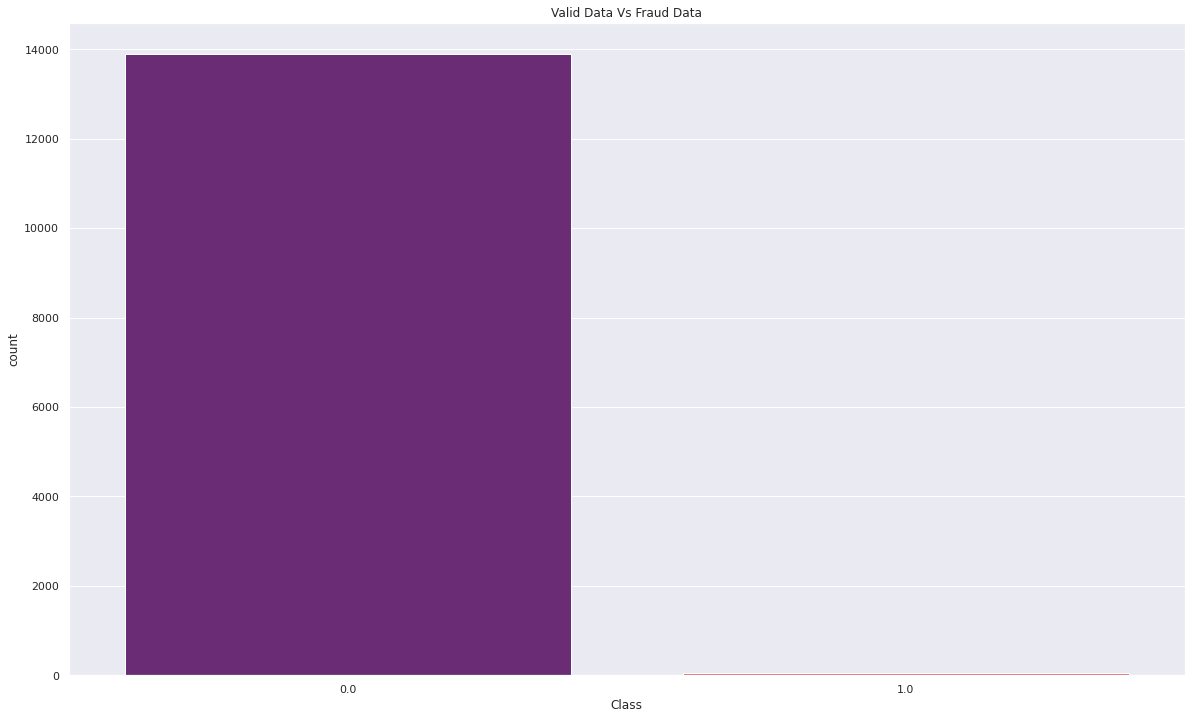

In [23]:
# 6. Determining the Fraud Data Cases (finding outliers)

sns.countplot(cred['Class'],palette='magma')
plt.title('Valid Data Vs Fraud Data')
plt.show()

In [24]:
fraud_dt=cred[cred['Class']==1]
valid_dt=cred[cred['Class']==0]

print('Fraud Cases:',len(fraud_dt))
print('Valid Cases:',len(valid_dt))

Fraud Cases: 56
Valid Cases: 13897


In [25]:
outlier_fraction=len(fraud_dt)/len(valid_dt)
outlier_fraction

0.00402964668633518

Only 0.19% fraudulent transaction out all the transactions. The data is highly Unbalanced. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset. But first, let’s implement the model without it and will balance the data only if needed.

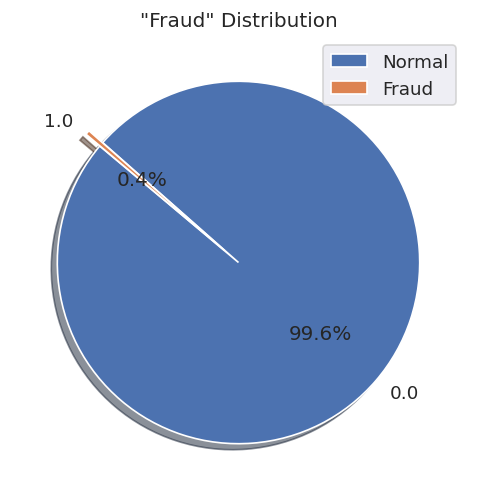

In [26]:
# Frauds and Non-Frauds
plt.figure(figsize=(8, 5), dpi=120)
cred.Class.value_counts().plot(kind="pie", explode=[0, 0.1], shadow=True, startangle=140, autopct='%1.1f%%')
plt.legend(labels=['Normal','Fraud'])
plt.title('"Fraud" Distribution')
plt.axis('off')
plt.show()

So as you can see, there is only 0.3% fraud (570 Samples from 284,807 entries), which is a severe imbalance. If we train our model just like this, there is no chance we'll ever predict a FRAUD case. So we'll have to deal with this and this project is mainly about this topic - Dealing with Imbalanced Classification!

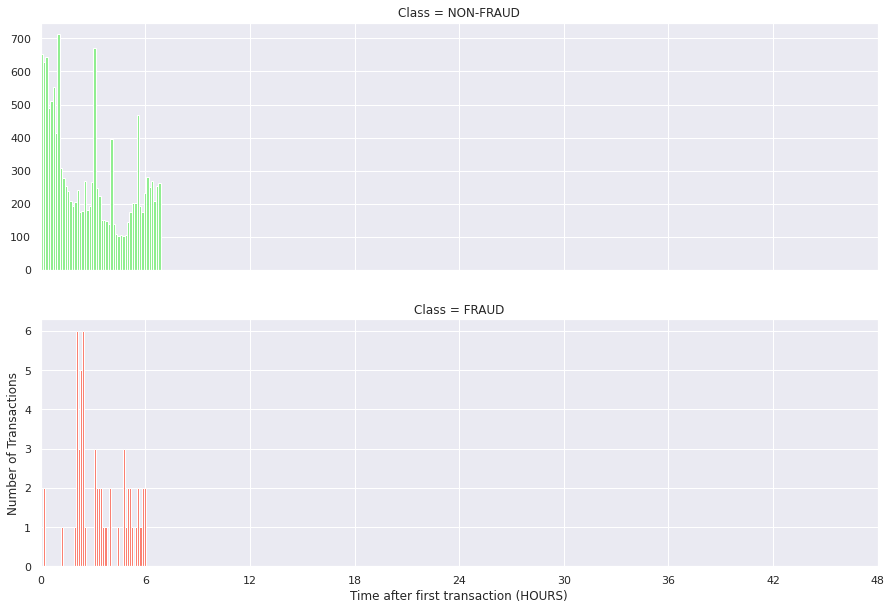

In [27]:
# Relation of Non-Frauds and Frauds with Transaction Time
values = cred["Class"].value_counts().index
figure, (non_fraud, fraud) = plt.subplots(2,1, sharex=True, figsize=(15, 10))

non_fraud.hist((cred["Time"]/60/60)[cred["Class"] == 0], bins=50, color="lightgreen")
non_fraud.set_title("Class = NON-FRAUD")

fraud.hist((cred["Time"]/60/60)[cred["Class"] ==1 ], bins=50, color="salmon")
fraud.set_title("Class = FRAUD")

plt.xticks(np.arange(0,54,6))
plt.xlim([0,48])
plt.xlabel("Time after first transaction (HOURS)")
plt.ylabel('Number of Transactions')

plt.show()

As you can see, the number of transactions for genuine users take a hit during late night and early morning hours. It also makes sense since most people sleep during this. On the contrary, for fraudulent transactions, the number sees sharp spikes during late hours, and during the daytime, the count is significantly less.

In [28]:
# 7. Data Pre-Processing

# https://www.kaggle.com/code/muhammadanas0716/credit-card-fraud-detetction-99-accuracy-eda

* PCA Transforming the Time & Amount columns

* Using the RobustScaler() to scale the Time & Amount columns

* Using SMOTE technique to solve the imbalancy
Some Recourses

To learn more about PCA transformations, you can read this: 

https://builtin.com/data-science/step-step-explanation-principal-component-analysis

To learn about Scaling, read this: 

https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

To read on RobustScaler, have a look here: 

https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/

In [29]:
# Pre-Processing Libs
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split

In [30]:
# Let's create a copy and do all the wrangling stuff on there so we have our orignal dataset preserved
credit_df = cred.copy()

In [31]:
# PCA transformations
pca = PCA(n_components = 2)
credit_df = credit_df.fillna(credit_df.mean())
columns = credit_df[["Time", "Amount"]]
pca.fit(columns)
credit_df[["Time", "Amount"]] = pca.transform(columns)

In [32]:
# Scaling with the Robust Scaler
transformer = RobustScaler().fit(columns)
credit_df[["Time", "Amount"]] = transformer.transform(columns)

In [48]:
#x=credit_df.iloc[:,1:29]
x = credit_df.drop('Class', axis = 1)
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.643554,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,2.869770
1,-0.643554,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.278674
2,-0.643483,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,7.777683
3,-0.643483,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,2.310066
4,-0.643412,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,1.163444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13949,1.109655,1.252924,-0.182189,-0.802716,-0.210981,1.916713,3.643624,-0.778711,0.818295,1.706962,...,-0.001336,-0.497088,-1.211285,0.043809,0.964159,0.442030,0.261483,-0.051402,0.005112,0.172390
13950,1.109797,-0.346979,-2.103284,-0.685061,1.961605,-0.401125,0.473632,1.133816,-0.256528,0.893409,...,1.437054,0.359662,-0.316275,-0.864259,-0.279881,0.491802,-0.353996,-0.149931,0.129795,16.681952
13951,1.110009,-6.053652,-5.988723,0.810413,-0.011811,1.308135,-0.590803,-0.725838,-0.234840,1.624646,...,-2.982379,-0.771970,1.474668,3.176363,-0.302410,0.052529,-0.373871,-0.700463,2.508443,0.949376
13952,1.110009,1.169121,-1.284945,0.032717,-0.681670,0.660598,4.412578,-1.913115,1.076592,1.501230,...,-0.265041,-0.557596,-0.882435,-0.041523,0.975445,0.297229,0.550515,0.015029,0.032067,1.592222


In [56]:
#y=credit_df.iloc[:,-1]

credit_df['Class'] = credit_df['Class'].astype(int)
y = credit_df['Class']
y

0        0
1        0
2        0
3        0
4        0
        ..
13949    0
13950    0
13951    0
13952    0
13953    0
Name: Class, Length: 13954, dtype: int64

In [57]:
# 7.2. Splitting Train and Test DataSet

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score   

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
print('Train Size = {} \nTest Size = {} \nTotal Size = {}'.format(x_train.shape[0],x_test.shape[0],x.shape[0]))

Train Size = 10465 
Test Size = 3489 
Total Size = 13954


In [59]:
# Using SMOTE to balance the data

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
import plotly.express as px

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


# Plot the results
fig = px.pie(values=y.value_counts(), 
             width=800, height=400, 
             title="Data Balance",
             color_discrete_sequence=["skyblue","black"])
fig.show()

Before OverSampling, counts of label '1': 42
Before OverSampling, counts of label '0': 10423 

After OverSampling, the shape of train_X: (20846, 30)
After OverSampling, the shape of train_y: (20846,) 

After OverSampling, counts of label '1': 10423
After OverSampling, counts of label '0': 10423


In [60]:
# 8 - Model Analysis

# Logistic Regression
# Naive Bayes (GaussianNB)
# Random Forest Classifier
# K-Neighbors Classifier
# XGBoost Classifier

In [61]:
# Modelling Libs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [62]:
# Naive Bayes
classifier = GaussianNB()
classifier.fit(x_train , y_train)
classifier_score = classifier.score(x_test , y_test).round(5)

In [64]:
# Decision Tree
dt =DecisionTreeClassifier(max_features=8 , max_depth=6)
dt.fit(x_train , y_train)
dt_score = dt.score(x_test , y_test).round(5)

In [65]:
# Random Forest Classifier
Rclf = RandomForestClassifier(max_features=8 , max_depth=6)
Rclf.fit(x_train, y_train)
Rclf_score = Rclf.score(x_test, y_test).round(5)

In [66]:
# Logistic Regression
lr = LogisticRegression(C = 100, max_iter=1000)
lr.fit(x_train , y_train)
lr_score = lr.score(x_test , y_test).round(5)

In [67]:
# K-Nearest
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
knn_score = knn.score(x_test, y_test).round(5)

In [68]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(x_train , y_train)
xgb_score = xgb.score(x_test, y_test).round(5)

In [ ]:
# Testing Metrics

# Accuracy
# F-1 Score
# Precision Score
# Recall Score

In [71]:
# Validating/Testing libs
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [72]:
model_comparison = {}
names = ["Decision Tree", "Naive", "Random Forest", "KNN", "Logistic Regression", "XGboost"]
models = [classifier, dt, Rclf, lr, knn, xgb]
results = {}

# Make Predictions
for model in models:
    results[str(model).split("(")[0]] = [model.predict(x_test)]   

In [73]:
# Find the scores of the metrics
for model, preds in results.items():
    model_comparison[model] = [
                            round(accuracy_score(y_test, pd.DataFrame(preds).T), 2),
                            round(f1_score(y_test, pd.DataFrame(preds).T,average='weighted'), 2),
                            round(precision_score(y_test, pd.DataFrame(preds).T), 2),
                            round(recall_score(y_test, pd.DataFrame(preds).T), 2),
    ]

In [74]:
results_df = pd.DataFrame(model_comparison, index=["Accuracy", "F-1 Score", "Precision Score", "Recall Score"])
results_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,GaussianNB,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression,KNeighborsClassifier,XGBClassifier
Accuracy,98.00%,100.00%,100.00%,100.00%,100.00%,100.00%
F-1 Score,99.00%,100.00%,100.00%,100.00%,100.00%,100.00%
Precision Score,13.00%,92.00%,100.00%,60.00%,100.00%,92.00%
Recall Score,79.00%,79.00%,79.00%,64.00%,79.00%,79.00%


In [77]:
score = [classifier_cr, dt_cr, Rclf_cr, lr_cr, knn_cr, xgb_cr]
Models = pd.DataFrame({
    'Classfication Algorithms':             ["GaussianNB", 
                                            "DecisionTreeClassifier", 
                                            "RandomForestClassifier",
                                            "LogisticRegression",
                                            "KNeighborsClassifier", 
                                            "XGBClassifier"],
    'Accuracy': score})
Models.sort_values(by='Accuracy', ascending=False)

,Classfication Algorithms,Accuracy
2,RandomForestClassifier,0.999212
5,XGBClassifier,0.998782
4,KNeighborsClassifier,0.998065
3,LogisticRegression,0.997420
1,DecisionTreeClassifier,0.997348
0,GaussianNB,0.978858


In [78]:
#Random Forest Classifier - highest accuracy
#saving the model
import pickle
pickle.dump(Rclf_cr,open('credit-card-fraud-detec.pkl','wb'))